In [10]:
# Loading important libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import sklearn.preprocessing as prepro
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
import xgboost as xgb

SEED = 50661
DATA_IMPUTE = "mean"

In [2]:
# Initializing train/test/val file locations

trainFile = "COL774_mammography/train.csv"
testFile = "COL774_mammography/test.csv"
valFile = "COL774_mammography/val.csv"

In [3]:
# preprocess data

def returnAgg(vector):
    if DATA_IMPUTE=="mean":
        return np.mean(vector)
    return np.median(vector)

def returnData(filename):
    df = pd.read_csv(filename)
    
    if DATA_IMPUTE!=None:
        
        ageRep = returnAgg(np.array(df[df.Age!='?']["Age"],dtype=float))
        shapeRep = returnAgg(np.array(df[df.Shape!='?']["Shape"],dtype=float))
        marginRep = returnAgg(np.array(df[df.Margin!='?']["Margin"],dtype=float))
        densityRep = returnAgg(np.array(df[df.Density!='?']["Density"],dtype=float))
        
        df.Age.replace('?',str(ageRep),inplace = True)
        df.Shape.replace('?',str(shapeRep),inplace = True)
        df.Margin.replace('?',str(marginRep),inplace = True)
        df.Density.replace('?',str(densityRep),inplace = True)
    
    df.dropna()
    df = df[(df.Age!='?') & (df.Shape!='?') & (df.Margin!='?') & (df.Density!='?')]
    
    X = np.array([df["Age"],df["Shape"],df["Margin"],df["Density"]],dtype = float).T
    Y = np.array(df["Severity"],dtype = float)
    
    #X = prepro.normalize(X)
    
    return X,Y

X_train,Y_train = returnData(trainFile)
X_test,Y_test = returnData(testFile)
X_val,Y_val = returnData(valFile)

Training accuracy : 0.9329608938547486
Testing accuracy : 0.7083333333333334
Validation accuracy : 0.7555555555555555


[Text(0.46878900249615973, 0.975, 'X[2] <= 2.893\ngini = 0.497\nsamples = 537\nvalue = [288, 249]'),
 Text(0.25547235023041476, 0.925, 'X[0] <= 64.5\ngini = 0.281\nsamples = 243\nvalue = [202, 41]'),
 Text(0.1975806451612903, 0.875, 'X[1] <= 3.5\ngini = 0.204\nsamples = 200\nvalue = [177, 23]'),
 Text(0.16167434715821813, 0.825, 'X[0] <= 34.5\ngini = 0.163\nsamples = 190\nvalue = [173, 17]'),
 Text(0.15552995391705068, 0.775, 'gini = 0.0\nsamples = 35\nvalue = [35, 0]'),
 Text(0.16781874039938557, 0.775, 'X[0] <= 61.5\ngini = 0.195\nsamples = 155\nvalue = [138, 17]'),
 Text(0.16167434715821813, 0.725, 'X[0] <= 58.5\ngini = 0.215\nsamples = 139\nvalue = [122, 17]'),
 Text(0.12672811059907835, 0.675, 'X[1] <= 2.849\ngini = 0.189\nsamples = 123\nvalue = [110, 13]'),
 Text(0.09984639016897082, 0.625, 'X[3] <= 2.453\ngini = 0.161\nsamples = 113\nvalue = [103, 10]'),
 Text(0.09370199692780339, 0.575, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.10599078341013825, 0.575, 'X[0] <= 57.

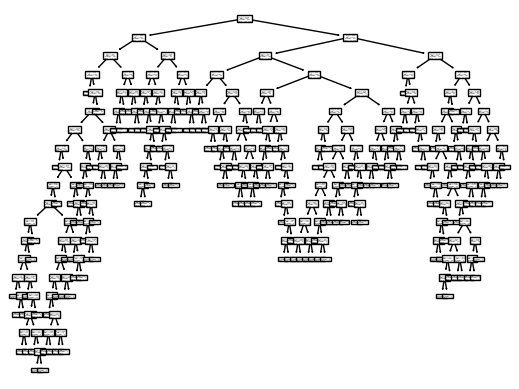

In [4]:
# 1.a

def printAccuracies(clf):
    
    Y_train_pred = clf.predict(X_train)
    print("Training accuracy : "+str(accuracy_score(Y_train,Y_train_pred)))

    Y_test_pred = clf.predict(X_test)
    print("Testing accuracy : "+str(accuracy_score(Y_test,Y_test_pred)))

    Y_val_pred = clf.predict(X_val)
    print("Validation accuracy : "+str(accuracy_score(Y_val,Y_val_pred)))

    
clf = DecisionTreeClassifier(random_state = SEED)
clf.fit(X_train,Y_train)
printAccuracies(clf)
tree.plot_tree(clf)

Optimal parameters obtained are : {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 9}
Training accuracy : 0.8491620111731844
Testing accuracy : 0.7777777777777778
Validation accuracy : 0.8444444444444444


[Text(0.4001865671641791, 0.9444444444444444, 'X[2] <= 1.5\nentropy = 0.996\nsamples = 537\nvalue = [288, 249]'),
 Text(0.1828358208955224, 0.8333333333333334, 'X[0] <= 64.5\nentropy = 0.528\nsamples = 201\nvalue = [177, 24]'),
 Text(0.09701492537313433, 0.7222222222222222, 'X[0] <= 34.5\nentropy = 0.424\nsamples = 174\nvalue = [159, 15]'),
 Text(0.08208955223880597, 0.6111111111111112, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0]'),
 Text(0.11194029850746269, 0.6111111111111112, 'X[0] <= 61.5\nentropy = 0.491\nsamples = 140\nvalue = [125, 15]'),
 Text(0.09701492537313433, 0.5, 'X[1] <= 2.5\nentropy = 0.529\nsamples = 125\nvalue = [110, 15]'),
 Text(0.04477611940298507, 0.3888888888888889, 'X[3] <= 2.453\nentropy = 0.491\nsamples = 112\nvalue = [100, 12]'),
 Text(0.029850746268656716, 0.2777777777777778, 'entropy = 0.0\nsamples = 12\nvalue = [12, 0]'),
 Text(0.05970149253731343, 0.2777777777777778, 'X[0] <= 57.5\nentropy = 0.529\nsamples = 100\nvalue = [88, 12]'),
 Text(0.029850746268

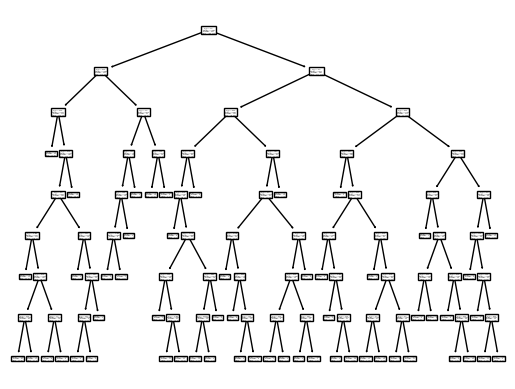

In [5]:
# 1.b

def doGridSearch(ourEstimator,ourParamGrid):
    grid_search = GridSearchCV(estimator = ourEstimator,param_grid = ourParamGrid)
    grid_search.fit(X_train,Y_train)

    clf = grid_search.best_estimator_
    print("Optimal parameters obtained are : "+str(grid_search.best_params_))
    printAccuracies(clf)
    
    return clf

param_grid = {'criterion' :['gini', 'entropy'],
             'max_depth' : range(1,11),
             'min_samples_split': range(2,11),
             'min_samples_leaf': range(1,11)}

clf = doGridSearch(DecisionTreeClassifier(random_state = SEED),param_grid)
tree.plot_tree(clf)

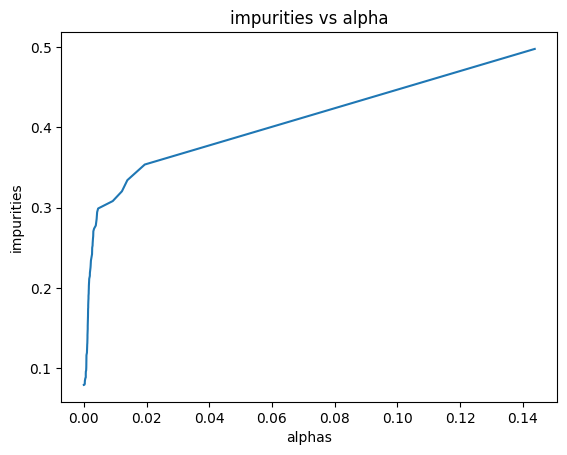

<Figure size 640x480 with 0 Axes>

In [6]:
#1.c 

def plotGraph(pruneDict,values,name):
    plt.plot(pruneDict['ccp_alphas'],values)
    plt.xlabel('alphas')
    plt.ylabel(name)
    plt.title(name+' vs alpha')
    #plt.savefig('1.1.c.'+name+'.png')
    plt.figure()

clf = DecisionTreeClassifier(random_state = SEED)
pruneDict = clf.cost_complexity_pruning_path(X = X_train,y = Y_train)

plotGraph(pruneDict,pruneDict['impurities'],'impurities')

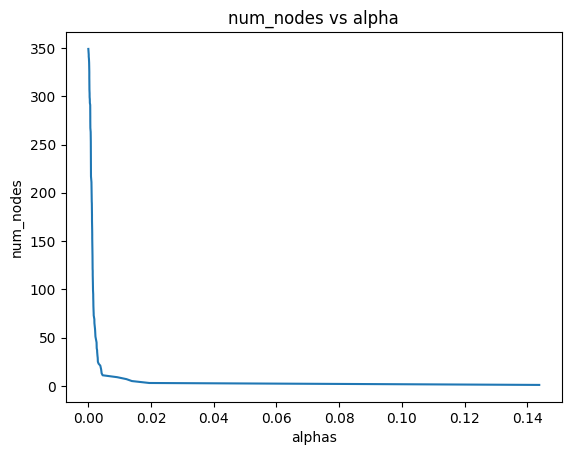

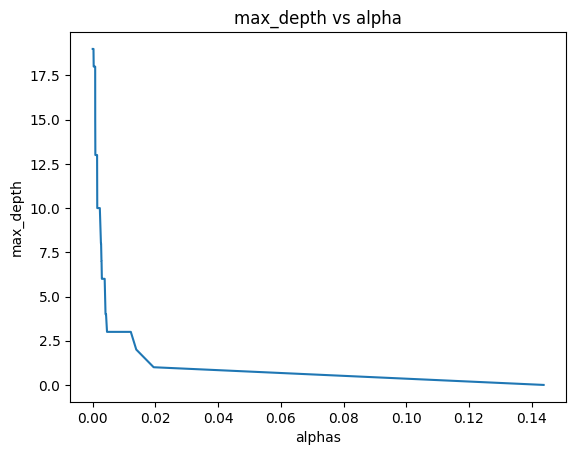

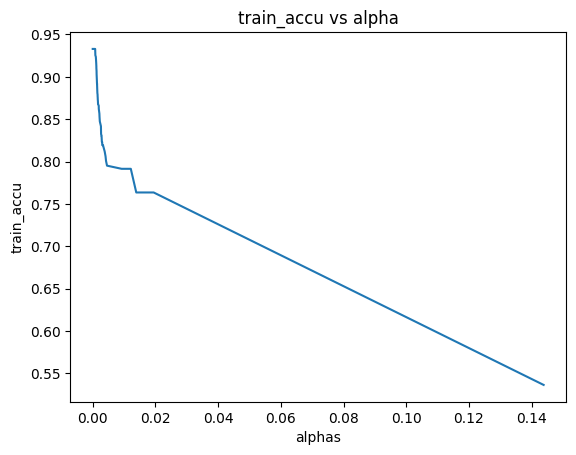

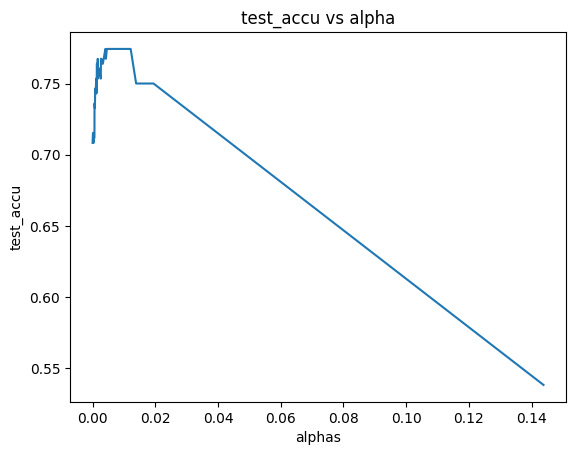

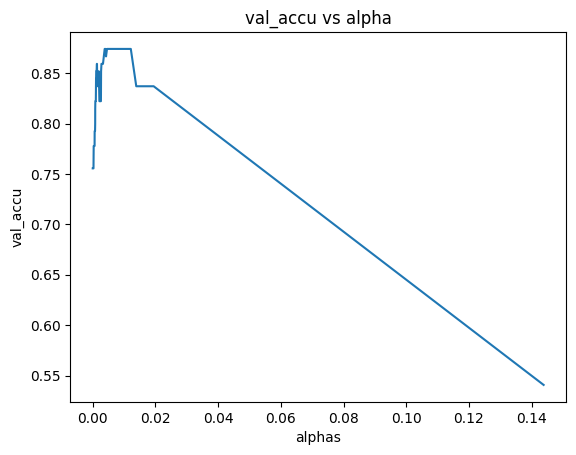

<Figure size 640x480 with 0 Axes>

In [7]:
numNodesList = []
depthList = []
trainList = []
testList = []
valList = []

for thisAlpha in pruneDict["ccp_alphas"]:
    clf = DecisionTreeClassifier(ccp_alpha = thisAlpha,random_state = SEED)
    clf.fit(X_train,Y_train)
    
    numNodesList.append(clf.tree_.node_count)
    depthList.append(clf.tree_.max_depth)
    
    Y_train_pred = clf.predict(X_train)
    trainList.append(accuracy_score(Y_train,Y_train_pred))

    Y_test_pred = clf.predict(X_test)
    testList.append(accuracy_score(Y_test,Y_test_pred))

    Y_val_pred = clf.predict(X_val)
    valList.append(accuracy_score(Y_val,Y_val_pred))

plotGraph(pruneDict,numNodesList,'num_nodes')
plotGraph(pruneDict,depthList,'max_depth')
plotGraph(pruneDict,trainList,'train_accu')
plotGraph(pruneDict,testList,'test_accu')
plotGraph(pruneDict,valList,'val_accu')

In [8]:
# 1.d

param_grid = {'criterion' :['gini', 'entropy'],
              'n_estimators' : [50,100,150,200],
              'max_features' : ["sqrt", "log2", None],
              'min_samples_split': [2,4,6,8,10]}

best_clf = doGridSearch(RandomForestClassifier(random_state = SEED,oob_score = True),param_grid)
print('OOB score : '+str(best_clf.oob_score_))

Optimal parameters obtained are : {'criterion': 'entropy', 'max_features': None, 'min_samples_split': 10, 'n_estimators': 50}
Training accuracy : 0.8696461824953445
Testing accuracy : 0.7847222222222222
Validation accuracy : 0.8518518518518519
OOB score : 0.74487895716946


In [11]:
# 1.e
param_grid = {'n_estimators' : [10,20,30,40,50],
              'subsample' : [0.1,0.2,0.3,0.4,0.5],
              'max_depth' : [4,5,6,7,8,9,10]}

clf = doGridSearch(xgb.XGBClassifier(),param_grid)

Optimal parameters obtained are : {'max_depth': 4, 'n_estimators': 30, 'subsample': 0.1}
Training accuracy : 0.7970204841713222
Testing accuracy : 0.7847222222222222
Validation accuracy : 0.8592592592592593
